In [1]:
import Performance_Spectrum
from scipy.stats import mode
from collections import Counter
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import os
import errno
import sys
import _pickle as pickle
import datetime
import math
import pandas as pd
import numpy as np
from pm4py.objects.log.importer.xes import importer as xes_importer
import plotly.graph_objs as go
from Constants import FIRST, DATE_RANGE, Color, Classifier, Segments, Short, Patterns
from jenks2 import jenks
from graphviz import Digraph
import networkx as nx
from Subdue import nx_subdue
import pygraphviz
# import pydot
# import neato
from itertools import groupby, chain
from statistics import mean
import rpy2.robjects.numpy2ri
from rpy2.robjects.packages import importr
rpy2.robjects.numpy2ri.activate()
from networkx.drawing.nx_agraph import graphviz_layout, to_agraph
# import pylab as plt
from statistics import median
import seaborn as sns; sns.set_theme()
from pylab import savefig

%matplotlib inline
pd.set_option('precision', 2)

%run Events.ipynb
%run Tresholds.ipynb
%run Plotting.ipynb
%run Resources.ipynb

C:\Users\jules\.conda\envs\Thesis\lib\site-packages\pm4py\objects\log\log.py:19: UserWarning: pm4py.objects.log.log is deprecated. please use the class pm4py.objects.log.obj instead
  warnings.warn("pm4py.objects.log.log is deprecated. please use the class pm4py.objects.log.obj instead")


In [2]:
# load the Event Logs objects
complete = Performance_Spectrum.load_log('complete')
successful = Performance_Spectrum.load_log('successful')
not_successful = Performance_Spectrum.load_log('not_successful')
_10days = Performance_Spectrum.load_log('10days')
_1030days = Performance_Spectrum.load_log('1030days')
_30days = Performance_Spectrum.load_log('30days')

In [3]:
# define event log variables
event_logs = [(complete, "complete")]            

# add segment ids to event logs
for event_log, _ in event_logs:
    event_log.pf['segment_id'] = range(len(event_log.pf))

In [4]:
# load the sets of cases of different categories
all_cases = list(map(int, complete.pf["case_id"].tolist()))
successful_cases = list(map(int, successful.pf["case_id"].tolist()))
not_successful_cases = list(map(int, not_successful.pf["case_id"].tolist()))
_10days_cases = list(map(int, _10days.pf["case_id"].tolist()))
_1030days_cases = list(map(int, _1030days.pf["case_id"].tolist()))
_30days_cases = list(map(int, _30days.pf["case_id"].tolist()))

In [5]:
# load durations
durations = pickle.load(open('output/dumps/durations', 'rb'))

In [6]:
# Compute tresholds
# compute_tresholds(event_logs)
tresholds = load_tresholds()

In [11]:
%run Events.ipynb
# Load system level events from saved files (faster)
# compute_system_level_events(event_logs, tresholds, ext_label=False)
events = load_system_level_events()

print("len events:",len(events["complete"]))

len events: 3855


In [13]:
%run Events.ipynb

# segment_groups = [Segments.SEGMENTS_CASCADE0, Segments.SEGMENTS_CASCADE1, Segments.SEGMENTS_CASCADE2]
names = [event_log[1] for event_log in event_logs]
# for name in names:
#     detect_cascades(events[name], name, segment_groups, criteria="very_strict", case_overlap=5)
cas = load_cascades(names)

print(len(cas["complete"]))

17102


In [10]:
%run Events.ipynb

# Compute frequent patterns
pat = patterns(cas["complete"], count=10)
pat.head(33)

,cascades,event_types,count,len
0,"[AAC, OCO, OCR, OSE, WCA.COM, WCO.SCH, WCO.STA...","[BAT, BAT, BAT, BAT, BAT, BAT, BAT, BST, BST]",13,9
1,"[ACR, WCA.SCH, WCA.STA]","[WLD, BAT]",11,2
2,"[ACR, WCA.SCH, WCA.STA]","[WLD, WLD]",15,2
3,"[AVA, ORE, WVA.SUS, WVA.RES]","[BAT, BAT, DEL]",11,3
4,"[ORE, WVA.SUS, WVA.RES]","[WLD, DEL]",12,2
5,"[WCO.ABO, WVA.SCH, WVA.STA, AVA, ORE, WVA.SUS,...","[BAT, BAT, BAT, BAT, BAT, DEL]",25,6
6,"[WCO.ABO, WVA.SCH, WVA.STA, AVA, ORE, WVA.SUS,...","[BAT, BAT, BAT, WLD, BAT, DEL]",10,6
7,"[WCO.ABO, WVA.SCH, WVA.STA, AVA, ORE, WVA.SUS,...","[BAT, WLD, WLD, BAT, BAT, DEL]",10,6
8,"[WCO.ABO, WVA.SCH, WVA.STA, AVA, ORE, WVA.SUS,...","[WLD, BAT, BAT, BAT, BAT, DEL]",12,6
9,"[WCO.ABO, WVA.SCH, WVA.STA, AVA, ORE, WVA.SUS,...","[WLD, BAT, BAT, WLD, BAT, DEL]",10,6


In [18]:
def create_segment_parts():
    df = pd.DataFrame(Segments.SEGMENTS_CASCADE0 + Segments.SEGMENTS_CASCADE1 + Segments.SEGMENTS_CASCADE2, columns =['segment'])
    conditions = [(df["segment"].isin(Segments.SEGMENTS_CASCADE0)),
                  (df["segment"].isin(Segments.SEGMENTS_CASCADE1)),
                  (df["segment"].isin(Segments.SEGMENTS_CASCADE2))]
    values = [0, 1, 2]
    df["part"] = np.select(conditions, values)
    df.to_excel("segment_parts.xlsx")
    
    return df

# Print overview of segments per part (for cascades)
create_segment_parts().head(50)

,segment,part
0,A_Create Application|COMPLETE - A_Submitted|CO...,0
1,A_Submitted|COMPLETE - W_Handle leads|SCHEDULE,0
2,W_Handle leads|SCHEDULE - W_Handle leads|WITHDRAW,0
3,W_Handle leads|WITHDRAW - W_Complete applicati...,0
4,A_Create Application|COMPLETE - W_Complete app...,0
5,W_Complete application|SCHEDULE - A_Concept|CO...,0
6,A_Concept|COMPLETE - W_Complete application|START,0
7,W_Complete application|SCHEDULE - W_Complete a...,0
8,W_Complete application|START - W_Complete appl...,0
9,W_Complete application|SUSPEND - A_Accepted|CO...,0


In [16]:
def abbreviations():
    df = pd.DataFrame(Short.ACTIVITY.keys(), columns =['segment'])
    df["abbreviation"] = df["segment"].apply(lambda x: Short.ACTIVITY[x])
    df.to_excel("segment_abbr.xlsx")
    
    return df
    
# print overview of activity abbreviations
abbreviations().head()

,segment,abbreviation
0,A_Create Application|COMPLETE,ACR
1,A_Submitted|COMPLETE,ASU
2,A_Concept|COMPLETE,ACO
3,A_Validating|COMPLETE,AVA
4,A_Pending|COMPLETE,APE


In [20]:
def segment_pattern_count(patterns):
    data = patterns.copy()
    data = data[["cascades", "count"]]
    data["segments"] = data["cascades"]. apply(lambda l: [Short.ACTIVITY_INV[first] + " - " + Short.ACTIVITY_INV[second] for first, second in zip(l, l[1:])])
    data = data[["segments", "count"]]
    
    pattern_count = dict(Counter([segment for sublist in list(data["segments"]) for segment in sublist]))
    segment_paths = data.explode("segments").groupby("segments")["count"].sum().to_dict()
    
    data2 = pd.DataFrame(pattern_count.items(), columns=['segment', 'patterns'])
    data2["paths"] = data2["segment"].apply(lambda x: segment_paths[x])
    data2 = data2.sort_values(by=['patterns'], ascending=False).reset_index()
    
    return data2[["segment", "patterns", "paths"]]
    
# print path- and pattern count per segment
df = segment_pattern_count(pat)
df.to_excel("segment_pattern_count.xlsx")  
df.head(40)

,segment,patterns,paths
0,A_Incomplete|COMPLETE - W_Call incomplete file...,17,237
1,W_Call incomplete files|START - A_Incomplete|C...,17,237
2,W_Call incomplete files|SCHEDULE - W_Call inco...,17,237
3,W_Validate application|ATE_ABORT - W_Call inco...,17,237
4,W_Validate application|SUSPEND - W_Validate ap...,17,237
5,W_Call incomplete files|SUSPEND - W_Call incom...,15,215
6,W_Validate application|SUSPEND - W_Validate ap...,7,90
7,O_Returned|COMPLETE - W_Validate application|S...,7,90
8,A_Validating|COMPLETE - O_Returned|COMPLETE,6,78
9,W_Validate application|START - A_Validating|CO...,5,67


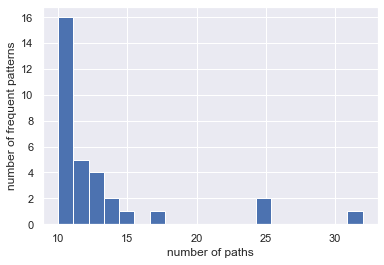

In [28]:
# print histogram of number of paths per frequent pattern

data = np.array(pat["count"])
h = plt.hist(data, bins=20)
plt.xlabel("number of paths")
plt.ylabel("number of frequent patterns")
plt.show()

In [14]:
# Check how a sequence of segments affects efficiency

subsets = ['pattern12', 'not-pattern12', 'pattern25', 'not-pattern25', 'pattern10', 'not-pattern10']
segments = [['W_Call after offers|ATE_ABORT - W_Call after offers|SCHEDULE'],
            ['W_Validate application|RESUME - W_Validate application|COMPLETE'],
            ['W_Call incomplete files|RESUME - W_Call incomplete files|COMPLETE'],
            ['O_Created|COMPLETE - O_Sent (online only)|COMPLETE'],
            ['W_Validate application|ATE_ABORT - O_Cancelled|COMPLETE'],
            ['W_Handle leads|START - W_Handle leads|COMPLETE'],
            ['W_Call incomplete files|RESUME - W_Call incomplete files|COMPLETE']]

cases = pickle.load(open('output/cases2/' + subsets[5], 'rb'))


check_findings(event_logs[0][0], cases, segments[6])

['W_Call incomplete files|RESUME - W_Call incomplete files|COMPLETE']
#cases in subset: 9049
#cases containing sequence: 1777
SUCC 1611 (90.7%) | NSUCC 166 (9.3%) | FAST 387 (21.8%) | AV 1107 (62.3%) | SLOW 283 (15.9%) | MED DUR 15
#cases not containing sequence: 29732
SUCC 15617 (52.5%) | NSUCC 14115 (47.5%) | FAST 5755 (19.4%) | AV 13226 (44.5%) | SLOW 10751 (36.2%) | MED DUR 19.0



In [15]:
# print a selection of the frequent patterns in string-format
for i in [7, 10, 12, 25, 11]:
    print(pattern_string(pat, i))

['CAO_SUS|ACA|WLH', 'ACA|OCA|WLD', 'OCA|CAO_ABO|WLD']
['RET|VAP_SUS|WLD', 'VAP_SUS|VAP_RES|DEL']
['VAP_SUS|OAC|BEN', 'OAC|PEN|BAT', 'PEN|VAP_ABO|BAT']
['VAP_SUS|VAP_ABO|DEL', 'VAP_ABO|CIP_SCH|BAT', 'CIP_SCH|CIP_STA|BAT', 'CIP_STA|INC|BAT', 'INC|CIP_SUS|BAT', 'CIP_SUS|CIP_RES|BST']
['VAL|RET|BAT', 'RET|VAP_SUS|BAT', 'VAP_SUS|VAP_RES|DEL']


In [14]:
# print statistics for all frequent patterns

%run Events.ipynb
patterns_df = compute_patterns_statistics2(event_logs[0][0], events, cas["complete"], pat)

_________________________________________
0 Complete pattern: ['AAC|OCO|BAT', 'OCO|OCR|BAT', 'OCR|OSE|BAT', 'OSE|WCA.COM|BAT', 'WCA.COM|WCO.SCH|BAT', 'WCO.SCH|WCO.STA|BAT', 'WCO.STA|ACO|BAT', 'ACO|WCO.SUS|BST', 'WCO.SUS|WCO.RES|BST']
|| 0 ||
---------------------------------------
['AAC|OCO|BAT', 'OCO|OCR|BAT', 'OCR|OSE|BAT', 'OSE|WCA.COM|BAT', 'WCA.COM|WCO.SCH|BAT', 'WCO.SCH|WCO.STA|BAT', 'WCO.STA|ACO|BAT', 'ACO|WCO.SUS|BST', 'WCO.SUS|WCO.RES|BST']
---------------------------------------
13 CASCADES
PATTERN:     SUCC 950 (51.0%)| NSUCC 911 (49.0%)| FAST 198 (10.6%)| AVG 863 (46.4%)| SLOW 800 (43.0%) (MED 33.0)| ( 1861 CASES )
NOT PATTERN: SUCC 6445 (53.2%)| NSUCC 5666 (46.8%)| FAST 1846 (15.2%)| AVG 5602 (46.3%)| SLOW 4663 (38.5%) (MED 33.0)| ( 12111 CASES )
SUCC SIGN: NO (p-value: 0.08524457376540438)
DUR SIGN: YES (p-value: 0.0004997501249375312)
_________________________________________
1 Complete pattern: ['ACR|WCA.SCH|WLD', 'WCA.SCH|WCA.STA|BAT']
|| 1 ||
-------------------------

10 CASCADES
PATTERN:     SUCC 135 (72.2%)| NSUCC 52 (27.8%)| FAST 10 (5.3%)| AVG 144 (77.0%)| SLOW 33 (17.6%) (MED 38)| ( 187 CASES )
NOT PATTERN: SUCC 7500 (76.6%)| NSUCC 2292 (23.4%)| FAST 1811 (18.5%)| AVG 6456 (65.9%)| SLOW 1525 (15.6%) (MED 39.0)| ( 9792 CASES )
SUCC SIGN: NO (p-value: 0.16376212796814613)
DUR SIGN: YES (p-value: 0.0004997501249375312)
_________________________________________
7 Complete pattern: ['WCO.ABO|WVA.SCH|BAT', 'WVA.SCH|WVA.STA|WLD', 'WVA.STA|AVA|WLD', 'AVA|ORE|BAT', 'ORE|WVA.SUS|BAT', 'WVA.SUS|WVA.RES|DEL']
---------------------------------------
['WCO.ABO|WVA.SCH|BAT', 'WVA.SCH|WVA.STA|WLD']
---------------------------------------
10 CASCADES
PATTERN:     SUCC 701 (78.1%)| NSUCC 196 (21.9%)| FAST 172 (19.2%)| AVG 605 (67.4%)| SLOW 120 (13.4%) (MED 39.0)| ( 897 CASES )
NOT PATTERN: SUCC 14661 (79.0%)| NSUCC 3904 (21.0%)| FAST 4091 (22.0%)| AVG 11878 (64.0%)| SLOW 2596 (14.0%) (MED 39.0)| ( 18565 CASES )
SUCC SIGN: NO (p-value: 0.5573447392541624)
DUR SIG

12 CASCADES
PATTERN:     SUCC 0 (0.0%)| NSUCC 395 (100.0%)| FAST 0 (0.0%)| AVG 0 (0.0%)| SLOW 395 (100.0%) (MED 32.0)| ( 395 CASES )
NOT PATTERN: SUCC 0 (0.0%)| NSUCC 7169 (100.0%)| FAST 738 (10.3%)| AVG 288 (4.0%)| SLOW 6143 (85.7%) (MED 32.0)| ( 7169 CASES )
SUCC SIGN: NO (p-value: 1.0)
DUR SIGN: YES (p-value: 0.0004997501249375312)
---------------------------------------
['ACA|OCA|WLD', 'OCA|WCO.ABO|WLD']
---------------------------------------
12 CASCADES
PATTERN:     SUCC 0 (0.0%)| NSUCC 443 (100.0%)| FAST 0 (0.0%)| AVG 0 (0.0%)| SLOW 443 (100.0%) (MED 32.0)| ( 443 CASES )
NOT PATTERN: SUCC 0 (0.0%)| NSUCC 7719 (100.0%)| FAST 753 (9.8%)| AVG 327 (4.2%)| SLOW 6639 (86.0%) (MED 32)| ( 7719 CASES )
SUCC SIGN: NO (p-value: 1.0)
DUR SIGN: YES (p-value: 0.0004997501249375312)
_________________________________________
11 Complete pattern: ['WCO.SUS|ACA|WLH', 'ACA|OCA|WLD', 'OCA|WCO.ABO|WLD']
|| 11 ||
---------------------------------------
['WCO.SUS|ACA|WLH', 'ACA|OCA|WLD', 'OCA|WCO.ABO|

14 CASCADES
PATTERN:     SUCC 927 (90.4%)| NSUCC 99 (9.6%)| FAST 132 (12.9%)| AVG 683 (66.6%)| SLOW 211 (20.6%) (MED 38.0)| ( 1026 CASES )
NOT PATTERN: SUCC 7342 (89.5%)| NSUCC 863 (10.5%)| FAST 1420 (17.3%)| AVG 5256 (64.1%)| SLOW 1529 (18.6%) (MED 39)| ( 8205 CASES )
SUCC SIGN: NO (p-value: 0.4164100894470387)
DUR SIGN: YES (p-value: 0.001999000499750125)
_________________________________________
18 Complete pattern: ['WVA.SUS|WVA.ABO|BEN', 'WVA.ABO|WCF.SCH|BAT', 'WCF.SCH|WCF.STA|BAT', 'WCF.STA|AIN|BAT', 'AIN|WCF.SUS|BAT', 'WCF.SUS|WCF.RES|BST']
|| 18 ||
---------------------------------------
['WVA.SUS|WVA.ABO|BEN', 'WVA.ABO|WCF.SCH|BAT', 'WCF.SCH|WCF.STA|BAT', 'WCF.STA|AIN|BAT', 'AIN|WCF.SUS|BAT', 'WCF.SUS|WCF.RES|BST']
---------------------------------------
17 CASCADES
PATTERN:     SUCC 1190 (90.7%)| NSUCC 122 (9.3%)| FAST 172 (13.1%)| AVG 865 (65.9%)| SLOW 275 (21.0%) (MED 38)| ( 1312 CASES )
NOT PATTERN: SUCC 7079 (89.4%)| NSUCC 840 (10.6%)| FAST 1380 (17.4%)| AVG 5074 (64.1%)|

13 CASCADES
PATTERN:     SUCC 1004 (86.8%)| NSUCC 153 (13.2%)| FAST 139 (12.0%)| AVG 759 (65.6%)| SLOW 259 (22.4%) (MED 39.0)| ( 1157 CASES )
NOT PATTERN: SUCC 11457 (84.8%)| NSUCC 2059 (15.2%)| FAST 2289 (16.9%)| AVG 8783 (65.0%)| SLOW 2444 (18.1%) (MED 39)| ( 13516 CASES )
SUCC SIGN: NO (p-value: 0.07206855872819679)
DUR SIGN: YES (p-value: 0.0004997501249375312)
---------------------------------------
['AIN|WCF.SUS|BAT', 'WCF.SUS|WCF.RES|DEL']
---------------------------------------
13 CASCADES
PATTERN:     SUCC 298 (84.4%)| NSUCC 55 (15.6%)| FAST 27 (7.6%)| AVG 238 (67.4%)| SLOW 88 (24.9%) (MED 38.5)| ( 353 CASES )
NOT PATTERN: SUCC 11804 (84.9%)| NSUCC 2094 (15.1%)| FAST 2250 (16.2%)| AVG 9051 (65.1%)| SLOW 2597 (18.7%) (MED 39)| ( 13898 CASES )
SUCC SIGN: NO (p-value: 0.7635366816779064)
DUR SIGN: YES (p-value: 0.0004997501249375312)
_________________________________________
22 Complete pattern: ['WVA.SUS|WVA.ABO|BEN', 'WVA.ABO|WCF.SCH|BAT', 'WCF.SCH|WCF.STA|WLD', 'WCF.STA|AIN|WL

35 CASCADES
PATTERN:     SUCC 1588 (90.8%)| NSUCC 160 (9.2%)| FAST 200 (11.4%)| AVG 1130 (64.6%)| SLOW 418 (23.9%) (MED 38)| ( 1748 CASES )
NOT PATTERN: SUCC 7024 (89.2%)| NSUCC 848 (10.8%)| FAST 1482 (18.8%)| AVG 5035 (64.0%)| SLOW 1355 (17.2%) (MED 39)| ( 7872 CASES )
SUCC SIGN: YES (p-value: 0.04701667474092198)
DUR SIGN: YES (p-value: 0.0004997501249375312)
---------------------------------------
['WCF.SCH|WCF.STA|BAT', 'WCF.STA|AIN|BAT']
---------------------------------------
35 CASCADES
PATTERN:     SUCC 2287 (86.3%)| NSUCC 362 (13.7%)| FAST 294 (11.1%)| AVG 1740 (65.7%)| SLOW 615 (23.2%) (MED 39.0)| ( 2649 CASES )
NOT PATTERN: SUCC 10360 (83.9%)| NSUCC 1994 (16.1%)| FAST 2220 (18.0%)| AVG 8008 (64.8%)| SLOW 2126 (17.2%) (MED 39)| ( 12354 CASES )
SUCC SIGN: YES (p-value: 0.0013377074864428054)
DUR SIGN: YES (p-value: 0.0004997501249375312)
---------------------------------------
['WCF.STA|AIN|BAT', 'AIN|WCF.SUS|BAT']
---------------------------------------
35 CASCADES
PATTERN:  

13 CASCADES
PATTERN:     SUCC 845 (85.3%)| NSUCC 146 (14.7%)| FAST 124 (12.5%)| AVG 649 (65.5%)| SLOW 218 (22.0%) (MED 39.0)| ( 991 CASES )
NOT PATTERN: SUCC 11802 (84.2%)| NSUCC 2210 (15.8%)| FAST 2390 (17.1%)| AVG 9099 (64.9%)| SLOW 2523 (18.0%) (MED 39)| ( 14012 CASES )
SUCC SIGN: NO (p-value: 0.41607673838893483)
DUR SIGN: YES (p-value: 0.0004997501249375312)
---------------------------------------
['WCF.STA|AIN|WLD', 'AIN|WCF.SUS|BAT']
---------------------------------------
13 CASCADES
PATTERN:     SUCC 806 (85.8%)| NSUCC 133 (14.2%)| FAST 119 (12.7%)| AVG 608 (64.7%)| SLOW 212 (22.6%) (MED 39)| ( 939 CASES )
NOT PATTERN: SUCC 11655 (84.9%)| NSUCC 2079 (15.1%)| FAST 2309 (16.8%)| AVG 8934 (65.1%)| SLOW 2491 (18.1%) (MED 39.0)| ( 13734 CASES )
SUCC SIGN: NO (p-value: 0.4507043887037392)
DUR SIGN: YES (p-value: 0.0009995002498750624)
---------------------------------------
['AIN|WCF.SUS|BAT', 'WCF.SUS|WCF.RES|DEL']
---------------------------------------
13 CASCADES
PATTERN:     SU

In [15]:
# export overview of all patterns to excel 
patterns_df.head(33)
patterns_df.to_excel('Data\patterns_df.xlsx', index = False)

In [32]:
# export frequent patterns to images

# to_graphs(pat)

In [25]:
# compute breaks for delayed events

del_events = system_level_events(event_logs[0][0], Segments.SEGMENTS_COMPLETE, tresholds["delayed"], "delayed", ext_label=False)
data2 = del_events.copy()
data2["nr_cases"] = data2["cases"].str.len()
event_sizes = list(data2["nr_cases"])

data3 = np.array(event_sizes)

gvf = 0.0
nclasses = 2
while gvf < .95:
    gvf = goodness_of_variance_fit(data3, nclasses)
    nclasses += 1
    
print(nclasses, gvf)

buckets = jenks(event_sizes, 7)
print(buckets)

[1, 3, 9, 19, 34, 58, 93, 159]


In [37]:
# print statistics for system-level events of a particular type

def system_level_events_statistics(event_log, events, event_type):
    log = event_log.pf.copy()
    log = log[log["segment_name"].isin(Segments.SEGMENTS_COMPLETE)]
    count_freq = dict(Counter(list(log["segment_name"])))
    
    inv_lookup = {v:k for k,v in Short.ACTIVITY.items()}
    df = events.copy()
    df = df[df["type"] == event_type]
    print("#events:", len(df))
    df["segment"] = df["start_activity"].apply(lambda x: inv_lookup[x]) + " - " + df["end_activity"].apply(lambda x: inv_lookup[x])
    df_segments = list(set(df["segment"]))
    print("#distinct segments:", len(df_segments))
    
    segments_freq = list(map(lambda x: count_freq[x], df_segments))
    frequent = [x for x in segments_freq if x > 19257]
    infrequent = [x for x in segments_freq if x <= 19257]
    print("#frequent", len(frequent))
    print("#infrequent", len(infrequent))

system_level_events_statistics(event_logs[0][0], events["complete"], "BAT")

#events: 1014
#distinct segments: 31
#frequent 15
#infrequent 16


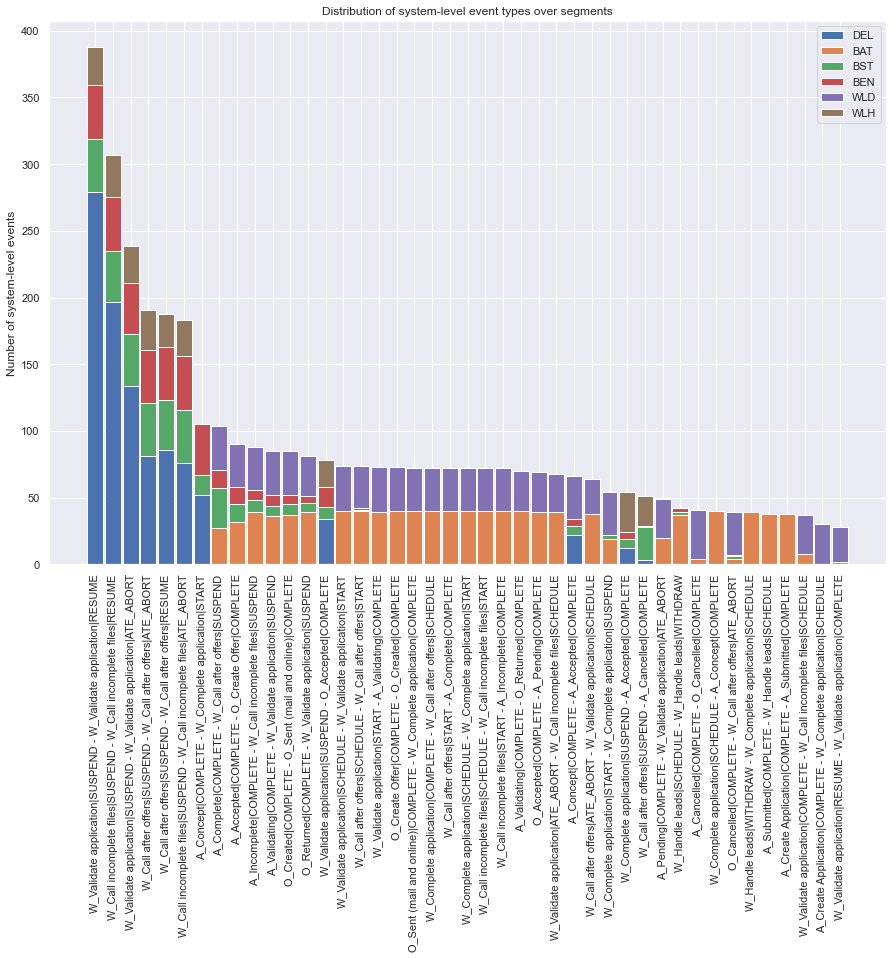

In [72]:
# plot stacked bar-chart with the number of system-level events of each type per segment

def plot_stacked(events):
    inv_lookup = {v:k for k,v in Short.ACTIVITY.items()}
    df = events.copy()
    df["segment"] = df["start_activity"].apply(lambda x: inv_lookup[x]) + " - " + df["end_activity"].apply(lambda x: inv_lookup[x])
    df = df[["segment", "type"]]
    df = pd.crosstab(df["segment"], df["type"]).reset_index()
    
    df["sum"] = df["BAT"] + df["BST"] + df["BEN"] + df["WLD"] + df["WLH"] + df["DEL"]
    df = df.sort_values(by='sum', ascending=False)
    
    labels = np.array(list(df["segment"]))
    del_ev = np.array(list(df["DEL"]))
    bat_ev = np.array(list(df["BAT"]))
    bst_ev = np.array(list(df["BST"]))
    ben_ev = np.array(list(df["BEN"]))
    wld_ev = np.array(list(df["WLD"]))
    wlh_ev = np.array(list(df["WLH"]))
    

    width = 0.9       # the width of the bars: can also be len(x) sequence

    fig, ax = plt.subplots(figsize=[15,10])

    ax.bar(labels, del_ev, width, label='DEL')
    ax.bar(labels, bat_ev, width, label='BAT', bottom=del_ev)
    ax.bar(labels, bst_ev, width, label='BST', bottom=del_ev+bat_ev)
    ax.bar(labels, ben_ev, width, label='BEN', bottom=del_ev+bat_ev+bst_ev)
    ax.bar(labels, wld_ev, width, label='WLD', bottom=del_ev+bat_ev+bst_ev+ben_ev)
    ax.bar(labels, wlh_ev, width, label='WLH', bottom=del_ev+bat_ev+bst_ev+ben_ev+wld_ev)

    ax.set_ylabel('Number of system-level events')
    ax.set_title('Distribution of system-level event types over segments')
    ax.legend()
    plt.xticks(rotation=90)
    
    plt.show()
    
ps = plot_stacked(events["complete"])